# Levelwing ecommerce analysis exercise

Date: April 26, 2021

In this exercise, I'll be attempting to answer a few questions about the ecommerce store's customers, brand, products, and user events. For example, what is the Pareto (i.e. 80/20) breakdown of customers? That is, which (if any) customers make up a large portion of the store's sales? (And likewise for brands and products.) What percentage of users are repeat buyers? What about one-time buyers? What is the cart abandonment rate? Are there trends in sales over the time period we'll be looking at? Since this exercise is fairly open-ended and doesn't specify a particular problem the store is trying to address, I'll just run through a few straightforward analyses of the data and examine the categories I mentioned above.

I'll start by combining the three datasets into one data structure, process it, graph some of the sub-structures we derive, and provide some commentary on the findings.

## Preliminary setup

For this project I'm using [pandas](https://pandas.pydata.org/docs/index.html) - "an open source...library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." Pandas has two main data structures: Series and Dataframes. Series are 1-dimensional structures, like an indexed sequence of values, and [Dataframes](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) are 2-dimensional structures, like a spreadsheet or database table.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [200]:
plt.ion()

In [5]:
# Import the three months of data as pandas dataframes
o19 = pd.read_csv('2019-Oct.csv', parse_dates=True, infer_datetime_format=True, index_col='event_time')
n19 = pd.read_csv('2019-Nov.csv', parse_dates=True, infer_datetime_format=True, index_col='event_time')
d19 = pd.read_csv('2019-Dec.csv', parse_dates=True, infer_datetime_format=True, index_col='event_time')

In [6]:
# Concatenate the three dataframes
dfs = [o19, n19, d19]
data = pd.concat(dfs)

## A quick look at the data

In [7]:
# Fields of the dataset
data.columns

Index(['event_type', 'product_id', 'category_id', 'category_code', 'brand',
       'price', 'user_id', 'user_session'],
      dtype='object')

In [8]:
# Top 5 rows of data
data.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
event_time,,,,,,,,
2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [9]:
# Count of records in full dataset
len(data)

12271406

In [10]:
# Unique category codes
data.category_code.unique()

array([nan, 'appliances.environment.vacuum', 'stationery.cartrige',
       'apparel.glove', 'accessories.bag',
       'furniture.living_room.cabinet', 'furniture.bathroom.bath',
       'appliances.personal.hair_cutter', 'accessories.cosmetic_bag',
       'appliances.environment.air_conditioner',
       'furniture.living_room.chair', 'sport.diving'], dtype=object)

In [11]:
# Unique event types
data.event_type.unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [12]:
# Example of one user's events
data[data.user_id == 595411904]

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
event_time,,,,,,,,
2019-12-31 23:40:46+00:00,view,5825203,2089259162625114209,NaN,kiss,7.92,595411904,d4067794-31fa-4d28-9b51-007dc7f7a6ee
2019-12-31 23:54:22+00:00,view,5825203,2089259162625114209,NaN,kiss,7.92,595411904,969cb337-28f2-490d-9a1d-20257e71f46d
2019-12-31 23:54:50+00:00,cart,5825203,2089259162625114209,NaN,kiss,7.92,595411904,969cb337-28f2-490d-9a1d-20257e71f46d
2019-12-31 23:55:03+00:00,view,5825203,2089259162625114209,NaN,kiss,7.92,595411904,969cb337-28f2-490d-9a1d-20257e71f46d
2019-12-31 23:55:07+00:00,view,5825203,2089259162625114209,NaN,kiss,7.92,595411904,969cb337-28f2-490d-9a1d-20257e71f46d
2019-12-31 23:55:33+00:00,view,5825203,2089259162625114209,NaN,kiss,7.92,595411904,192490fc-48f3-40bc-97c1-eca62a766ff0
2019-12-31 23:57:32+00:00,view,5528911,2151191070908613477,NaN,NaN,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77
2019-12-31 23:58:04+00:00,view,5529515,2151191070908613477,NaN,NaN,1.00,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77
2019-12-31 23:58:50+00:00,view,5528911,2151191070908613477,NaN,NaN,3.97,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77


## Sales over time

In [13]:
purchase_events = data[data.event_type == 'purchase']
sales_by_day = purchase_events.price.groupby(purchase_events.index.date).sum()

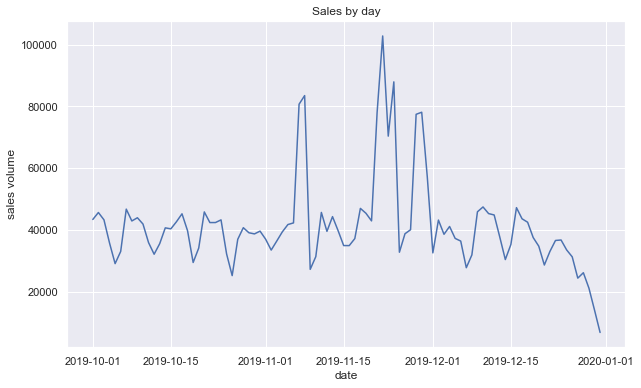

In [201]:
plt.figure(1, figsize=(10,6))
ax = plt.gca()
ax.set(xlabel="date", ylabel="sales volume", title="Sales by day")
ax.plot(sales_by_day)
plt.show()

### A closer look at the volatility in sales volume

As we can see in the above graph, the sales data is quite volatile. Since we're just looking at data from a 3-month period, it's not likely that seasonality would explain the volatility, but we can get a closer look at the sales patterns by each month, since we already have corresponding dataframes.

Let's plot each of those below. (Note that we're explicitly setting the range of y values for each plot so that we can normalize the volume of activity from each time period.)

In [ ]:
# Select purchase events
oct_purchases = o19[o19.event_type == 'purchase']
nov_purchases = n19[n19.event_type == 'purchase']
dec_purchases = d19[d19.event_type == 'purchase']

oct_purchases_sums = oct_purchases.price.groupby(oct_purchases.index.date).sum()
nov_purchases_sums = nov_purchases.price.groupby(nov_purchases.index.date).sum()
dec_purchases_sums = dec_purchases.price.groupby(dec_purchases.index.date).sum()

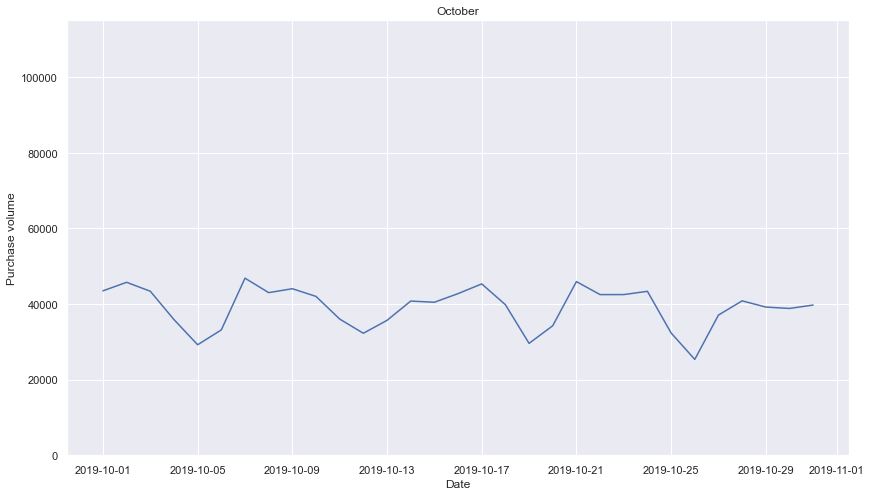

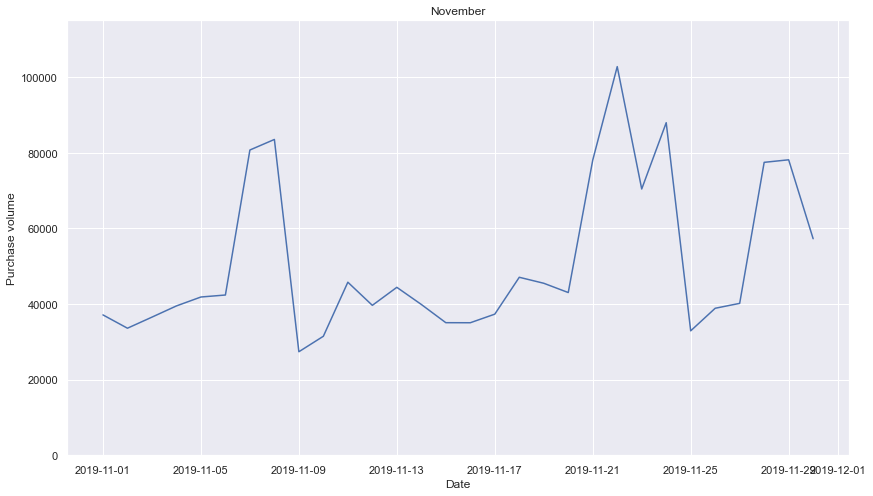

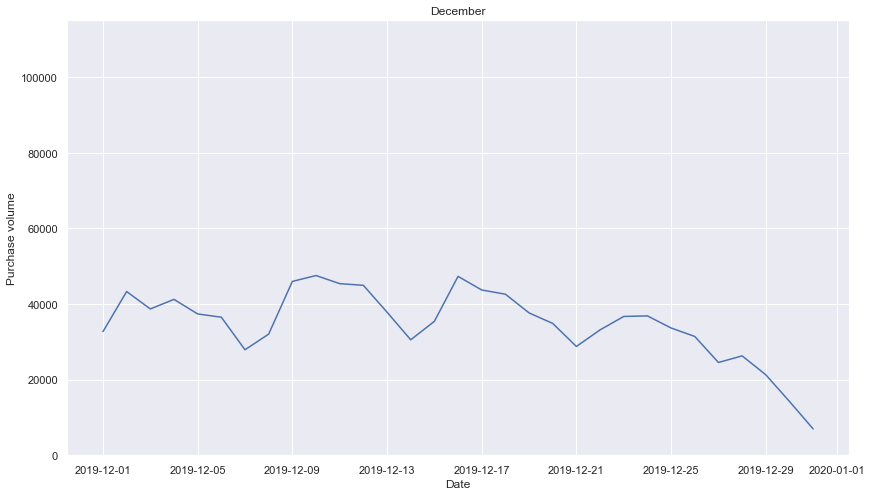

In [173]:
# Create figures
plt.figure(2, figsize=(14,8))
ax1 = plt.gca()
ax1.set(xlabel="Date", ylabel="Purchase volume", title="October", ylim=(0, 115000))
ax1.plot(oct_purchases_sums.index, oct_purchases_sums) # October data
plt.show()

plt.figure(3, figsize=(14,8))
ax2 = plt.gca()
ax2.set(xlabel="Date", ylabel="Purchase volume", title="November", ylim=(0, 115000))
ax2.plot(nov_purchases_sums.index, nov_purchases_sums) # November data
plt.show()

plt.figure(4, figsize=(14,8))
ax3 = plt.gca()
ax3.set(xlabel="Date", ylabel="Purchase volume", title="December", ylim=(0, 115000))
ax3.plot(dec_purchases_sums.index, dec_purchases_sums) # December data
plt.show()

There are a few things we can gather from the three graphs above.

First, there *does* seem to be a slight degree of local "seasonality". Take a look at the December chart. We can see minor peaks at 12/2, 12/16, and 12/23. It turns out (from looking at a calendar of 2019) that these dates were Mondays. This is similarly true for October, although in some cases the purchase volume increases slightly on Tuesdays. From this we might conclude that sales could be increased by running a promotion or ad campaign on days *other* than Monday (or Tuesday). (Below we'll look at **view** volume, the chart of which may suggest other days (where view volume is higher than usual but sales are lower) on which to run a promotion or ad campaign.)

Second, we can notice that the November sales are even more volatile than those of October and December. We do see minor peaks at 11/11 and 11/18, which were Mondays, but they aren't significant. What is significant, on the other hand, is a peak on 11/22. In 2019, 11/22 was a Friday. From this we can surmise that either the shop ran a Black Friday sale or that customers were already doing their holiday shopping on Black Friday and therefore made a purchase with this company even if no sales promotion was running. In fact, while we're on this topic, let's go a little further. Let's find a product that was purchased on both black Friday and on some occasion in October and then compare the prices.

In [16]:
# Create a sub-frame for the events on Black Friday
blk_friday_events = n19.loc['2019-11-22']

# Initialize a variable to hold the product id we want to examine
product = None

# Go through Black Friday events until we find a product id that was also purchased in October.
# It shouldn't take long since we can break out of the for-loop once we've found one.
for pid in blk_friday_events.product_id:
    if pid in list(blk_friday_events.product_id.values) and pid in list(o19.product_id.values):
        product = pid
        break

# Compare the price of this product on Black Friday and on a day when it was purchased in October
blk_friday_events[blk_friday_events.product_id == product].iloc[0].price == o19[o19.product_id == product].iloc[0].price

False

As we can see, the product sold on Black Friday for a different price from what it was purchased for on a day in October. It's likely, then, that, on Black Friday, the business ran a storewide sale, that it had a promotion for that specific product, or that a discount code or coupon was used. We could go further and determine definitively which of these was the case (for example, by comparing every Black Friday purchase for the product id in question or doing the same analysis for every product that was purchased on Black Friday), but we'll leave that out of this analysis.

### Purchase and view correlation

Let's go back to our inquiry about view volume. If view and purchase volume don't align day-wise, then that may suggest marketing opportunities. Since view volume is much higher than purchase volume, we'll scale it down by a factor of 10, which will make the chart easier to read. We'll create a grouping on views for each month, build dataframes with view and purchase volume as the columns, and then plot the two fields of each dataframe.

In [92]:
# Select view events
oct_views = o19[o19.event_type == 'view']
nov_views = n19[n19.event_type == 'view']
dec_views = d19[d19.event_type == 'view']

# Group by date and sum the price field
oct_views_sums = oct_views.price.groupby(oct_views.index.date).sum()
nov_views_sums = nov_views.price.groupby(nov_views.index.date).sum()
dec_views_sums = dec_views.price.groupby(dec_views.index.date).sum()

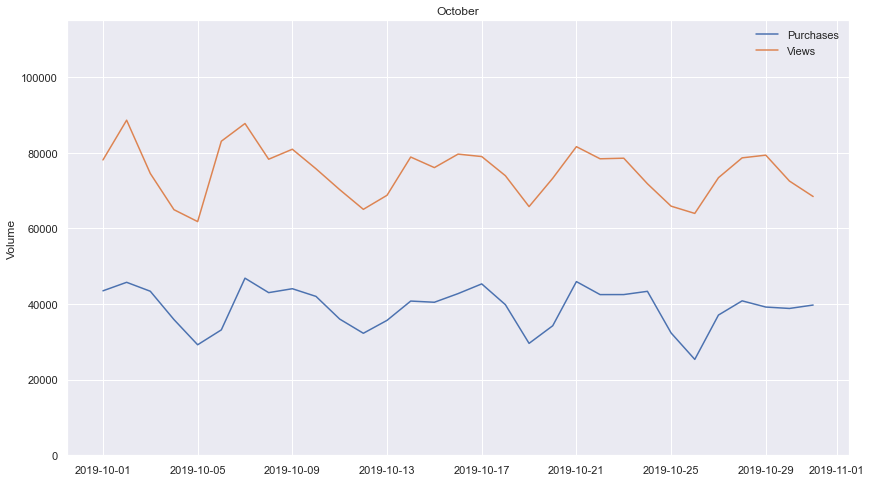

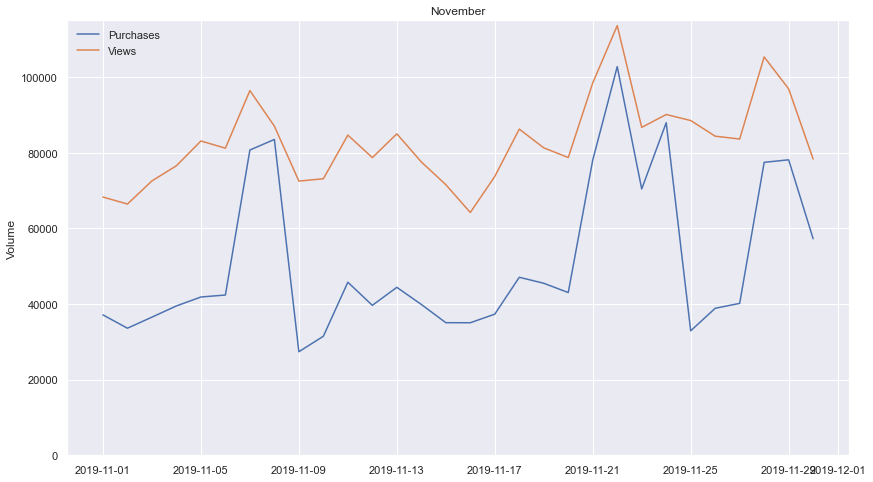

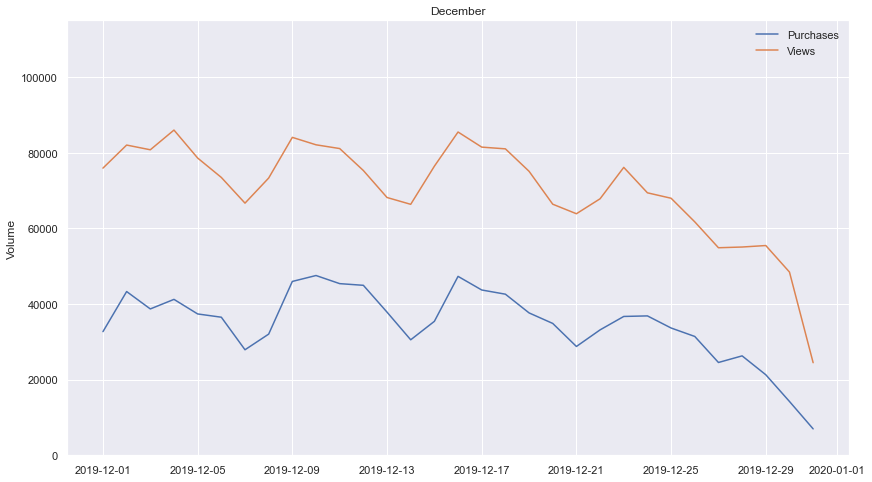

In [174]:
# Build plots
plt.figure(5, figsize=(14,8))
# plt.subplot(111)
ax = plt.gca()
ax.set(ylabel="Volume", title="October", ylim=(0, 115000)) # October
oct_l1, = ax.plot(oct_purchases_sums, label="Purchases")
oct_l2, = ax.plot(oct_views_sums / 10, label="Views")
ax.legend(handles=[oct_l1, oct_l2])
plt.show()

plt.figure(6, figsize=(14,8))
# plt.subplot(111)
ax = plt.gca()
ax.set(ylabel="Volume", title="November", ylim=(0, 115000)) # November
nov_l1, = ax.plot(nov_purchases_sums, label="Purchases")
nov_l2, = ax.plot(nov_views_sums / 10, label="Views")
ax.legend(handles=[nov_l1, nov_l2])
plt.show()

plt.figure(7, figsize=(14,8))
# plt.subplot(111)
ax = plt.gca()
ax.set(ylabel="Volume", title="December", ylim=(0, 115000)) # December
dec_l1, = ax.plot(dec_purchases_sums, label="Purchases")
dec_l2, = ax.plot(dec_views_sums / 10, label="Views")
ax.legend(handles=[dec_l1, dec_l2])
plt.show()

We can see that views and purchases are highly correlated. This is probably to be expected. When customers are making a purchase, it's highly likely that they're viewing several products other than the ones they finally purchase, and furthermore every item that is purchased is also viewed. Still, it's worth making the comparison to know for sure.

## Customer analysis

A few bits of information that could be useful to a marketing or merchandising team.

In [18]:
# Select purchase events
purchases = data[data.event_type == 'purchase']

# Remove negative and zero value purchases
purchases = purchases[purchases.price > 0]

# Create grouping by user_session field
user_session_grp = purchases.groupby('user_session')

In [32]:
# Sum the price field by user_session
purchase_values = round(user_session_grp.price.sum(), ndigits=2)

In [424]:
print(f'Total sales in Oct, Nov, Dec: ${np.sum(purchase_values)}')

Total sales in Oct, Nov, Dec: $3821767.49


In [426]:
print(f'Average purchase value: ${round(np.mean(purchase_values), ndigits=2)}')

Average purchase value: $40.49


In [427]:
print(f'Median purchase value: ${round(np.median(purchase_values), ndigits=2)}')

Median purchase value: $29.16


In [23]:
# Select positive value purchases
purchases = data[data.event_type == 'purchase']
purchases = purchases[purchases.price > 0]

# Create group on user_id field
# customer_grp = data[data.event_type == 'purchase'].groupby('user_id')
customer_grp = purchases.groupby('user_id')

sales_by_customer = customer_grp.price.sum().sort_values(ascending=False)

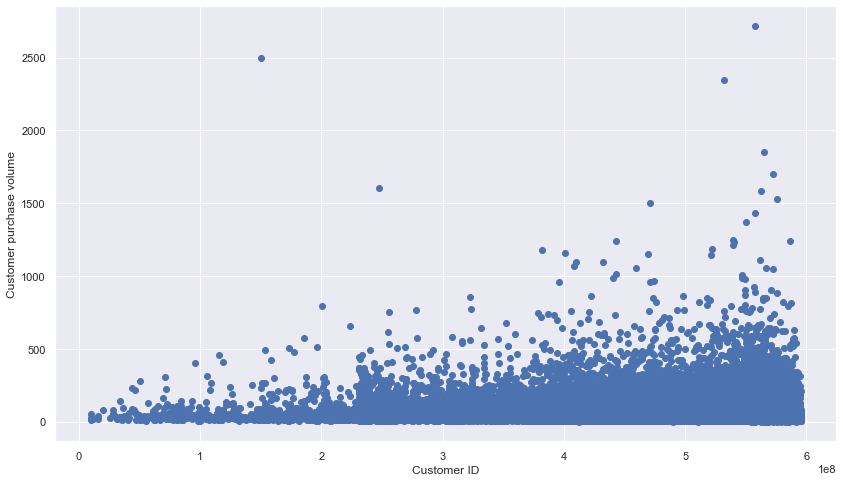

In [175]:
# Build plot
fig = plt.figure(8, figsize=(14, 8))
ax = fig.gca()
ax.scatter(sales_by_customer.index, sales_by_customer)
ax.set(xlabel="Customer ID", ylabel="Customer purchase volume")
plt.show()

### 80/20 analysis of sales by customer

The Pareto Principle, also known as the 80/20 principle, suggests that 20% of inputs or causes are responsible for 80% of outputs or results. In the real world these numbers may be lower or higher, but the idea is that a few input variables tend to contribute to a large majority of output variables.

For this analysis, we'll calculate 80% of sales, and then iterate through `sales_by_customer` until we have a list of customers whose purchases add up to (approximately) 80% of sales. We can then compare the size of that list to the list of all customers to find our "whales".

In [160]:
eighty_pct_volume = sales_by_customer.sum() * 0.8

whale_cxs = [] # CX is customer
cx_sales_counter = 0
while cx_sales_counter < eighty_pct_volume:
    for id, amount in sales_by_customer.iteritems():
        if cx_sales_counter >= eighty_pct_volume:
            break
        else:
            cx_sales_counter += amount
            whale_cxs.append(id)

In [161]:
round(len(whale_cxs) / len(sales_by_customer), ndigits=2)

0.45

Here we see that about 45% of customers (purchasers) make up 80% of sales over the three months of data.

### Repeat and one-time customers

In [182]:
# Count the number of purchases per customer
purchaser_counts = purchase_events.groupby('user_id').user_id.count()

In [183]:
total_cxs = purchaser_counts.count() # Users who made at least one purchase
total_cxs

72225

In [184]:
one_time_cxs = purchaser_counts[purchaser_counts == 1].count()
one_time_cxs

7281

In [185]:
repeat_cxs = purchaser_counts[purchaser_counts > 1].count()
repeat_cxs

64944

In [186]:
print("Repeat-buyers percentage of total customers: ", round((repeat_cxs / total_cxs) * 100, ndigits=1), "%")

Repeat-buyers percentage of total customers:  89.9 %


### Cart abandonment rate

Here's a chart of all event types and their percentage of total events:

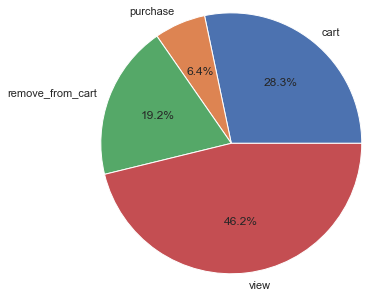

In [176]:
event_type_counts = data.groupby(data.event_type).event_type.count()

fig = plt.figure(9)
ax = plt.gca()
ax.pie(event_type_counts, labels=event_type_counts.index, autopct='%1.1f%%', radius=1.5)
plt.show()

Cart abandonment rate (CAR) is the percentage of items that are added to the cart and not purchased. To determine the CAR for our store, we can use this simple formula:

`(C - P - R) / C`,

where C is the number of cart events, P is the number of purchase events, and R is the number of remove-from-cart events.

To see why this works, imagine we had 100 cart, 90 purchase, and 5 remove-from-cart events. At the end of the day, so to speak, there would be 95 products in the cart. If customers purchased 90 of those products, then that leaves 5 items that went to the cart but weren't purchased. The CAR in that case is 5/100, or 5%.

We'll write a simple function to calculate CAR, and then find the CAR for our data.

In [187]:
def calc_CAR_pct(c: int, p: int, r: int) -> float:
  '''
  @param
    c := number of cart events
    p := number of purchase events
    r := number of remove-from-cart events

  Returns percentage value
  '''
  return round(((c - p - r) / c) * 100, ndigits=2)

In [189]:
num_cart_events = data[data.event_type == 'cart'].event_type.count()
num_purchase_events = data[data.event_type == 'purchase'].event_type.count()
num_remove_events = data[data.event_type == 'remove_from_cart'].event_type.count()

print("Cart abandonment rate:", calc_CAR_pct(num_cart_events, num_purchase_events, num_remove_events), "%")

Cart abandonment rate: 9.73 %


### Non-purchasing users

Let's briefly see how many users have viewed products but haven't made a purchase. There may be a more idiomatic way to make this query, but we can do a simple iteration through a grouping by user and keep only the ones for which `purchase` doesn't appear in their event types.

In [402]:
# Events, grouped by user_id
user_events = data.groupby('user_id').event_type.unique()

In [406]:
# Filter in users who have not made a purchase
view_only = [user for user, es in user_events.iteritems() if 'purchase' not in es]

In [413]:
print("Number of users who haven't made a purchase:", len(view_only))

Number of users who haven't made a purchase: 940336


In [414]:
print("Total number of unique users:", len(user_events))

Total number of unique users: 1012561


This tells us that quite a lot of users come to the site without making a purchase.

A follow-up to this inquiry could be to look at users who have added items to a cart but haven't made a purchase. This would be a correlary to the CAR analysis above. Our CAR analysis gave us different information, since it's possible that a user who *has* made a purchase may on another occasion abandon their carted items. The computation above has provided us with a list of users who have *never* made a purchase, so we might handle them differently from users who have made a purchase but also abandoned their cart.

## Brand analysis

### Breakdown of sales by brand

For this analysis, we'll use a histogram to plot the distribution of brands by sales. Matplotlib, a visualization library for Python, will automatically create the "bins" based on ranges of values, and after we chart the data we can inspect these bins and the number of brands in each.

In [36]:
# Group by brand keeping only purchase events
purchases = data[data.event_type == 'purchase']
purchases = purchases[purchases.price > 0]

brand_grp = purchases.groupby('brand')

In [48]:
# Calculate sales by brand
sales_by_brand = brand_grp.price.sum().sort_values(ascending=False)

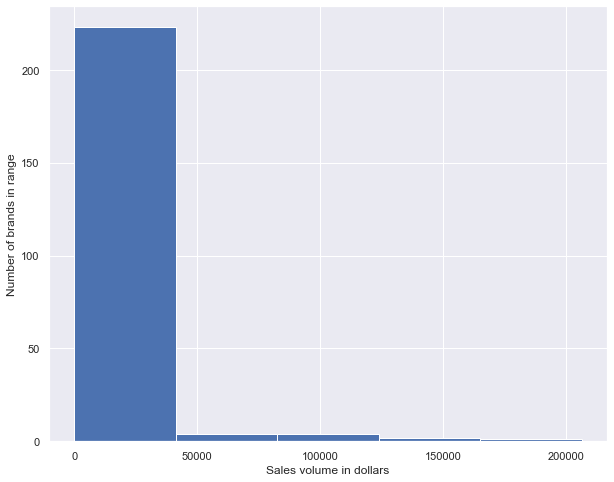

In [220]:
# Build plot
fig = plt.figure(10, figsize=(10,8))
ax = plt.gca()
n, bins, _= ax.hist(sales_by_brand, bins=5)
ax.set(xlabel="Sales volume in dollars", ylabel="Number of brands in range")
plt.show()

This histogram shows us that the vast majority of brands sold in our store sell relatively few products (at least in the time frame for which we have data). Only a few brands have sales over $100k for this time frame. Let's inspect the bins and the value ranges from the histogram.

In [225]:
# Utility function that we can map onto our list of bin values
def round2(n: float) -> float:
    return round(n, ndigits=2)

In [234]:
print("Number of brands in each bin:", list(n))
print("Bin boundaries:", list(map(round2, bins)))

Number of brands in each bin: [223.0, 4.0, 4.0, 2.0, 1.0]
Bin boundaries: [3.1, 41297.52, 82591.94, 123886.36, 165180.78, 206475.2]


<span class="tex2jax_ignore">In the cell output above, we see that 223 brands have sales (for this time frame) between ~$3 and ~$41297, 4 between ~$41297 and ~$82591, and so on. This is quite a distribution, but it's not uncommon for a retailer to stock a few brands that sell much more than the majority.

But can we get a sense of how much in sales the top brands account for? We'll take one approach to this question in the next section.

### 80/20 analysis of sales by brand

We'll use the Pareto Principle again to find the percentage of brands that account for 80% of sales. We're using the value of 80% somewhat arbitrarily, since there may be a more elucidating distribution, such as 80/10 or 90/10, but for the sake of brevity we'll stick with 80%.

Below is essentially the same computation we performed on the customer purchases data subset:

In [231]:
eighty_pct_volume_brand = sales_by_brand.sum() * 0.8

whale_brands = []
brand_sales_counter = 0
while brand_sales_counter < eighty_pct_volume_brand:
    for id, amount in sales_by_brand.iteritems():
        if brand_sales_counter >= eighty_pct_volume_brand:
            break
        else:
            brand_sales_counter += amount
            whale_brands.append(id)

In [232]:
# For this calculation we want to compare whale brands to the list of all brands offered in the store,
# even if no products by that brand have been purchased.
all_brands = data.brand.unique()

In [351]:
print("Percentage of brands that account for 80% of sales:", round((len(whale_brands) / len(all_brands)) * 100, ndigits=2), "%")

Percentage of brands that account for 80% of sales: 14.34 %


From this calculation we can see that there's a much stronger power law breakdown of brand sales compared with that of customers, which was already quite evident from the "Sales by brand" chart above: 14% of brands stocked by the store account for 80% of sales.

This information could be helpful, for example, when considering inventory management. Let's look at the number of products carried for some of the brands sold by the store. (Because we have so many brands, we'll only plot the top 14%.)

In [275]:
# Unique products by brand
num_unique_products = data.groupby('brand').product_id.nunique()

In [345]:
records = pd.DataFrame({'sales': sales_by_brand, 'num_products': num_unique_products}).sort_values(by='sales', ascending=False)[:n]

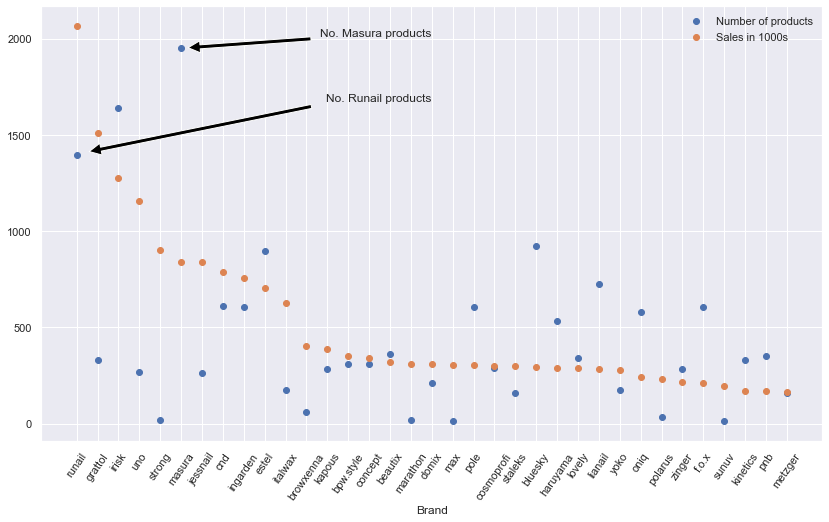

In [346]:
fig = plt.figure(11, figsize=(14,8))
ax = plt.gca()
ax.scatter(records.index, records.num_products, label="Number of products")
ax.scatter(records.index, records.sales / 100, label="Sales in 1000s")

for tick in ax.get_xticklabels():
    tick.set_rotation(55)
fig.align_xlabels()

ax.set(xlabel="Brand")

ax.legend()

ax.annotate("No. Masura products",
            xy=(5, 1950), xycoords='data',
            xytext=(0.5, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate("No. Runail products",
            xy=(0, 1400), xycoords='data',
            xytext=(0.5, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.show()

We can see that the shop has ~1900 unique products for the brand Masura. On the other hand, there are ~1400 unique products for the brand Runail. We can also see that sales of Runail products were just over <span class="tex2jax_ignore">$200k for the period we're looking at, while sales of Masura products were ~$80k. Even though Masura's product offerings (in this shop) are nearly 40% greater than Runail's, the shop does more than twice as much in sales of Runail's products compared to those of Masura.

Masura is the 6th best selling brand for this shop, so clearly the shop would want to continue selling its products, but perhaps if they looked closer at Masura's products they might be able to shrink the inventory by a sizable factor and still maintain a high sales volume thereof.

## Product analysis

### 80/20 breakdown of products

Here we'll do the same 80/20 analysis as we did for customers and brands:

In [ ]:
purchases = data[data.event_type == 'purchase']
purchases = purchases[purchases.price > 0]

product_grp = purchases.groupby('product_id')

sales_by_product = product_grp.price.sum().sort_values(ascending=False)

In [355]:
eighty_pct_volume_product = sales_by_product.sum() * 0.8

whale_products = []
prod_sales_counter = 0
while prod_sales_counter < eighty_pct_volume_product:
    for id, amount in sales_by_product.iteritems():
        if prod_sales_counter >= eighty_pct_volume_product:
            break
        else:
            prod_sales_counter += amount
            whale_products.append(id)

In [356]:
all_products = data.product_id.unique()

In [357]:
print("Percentage of products that account for 80% of sales:", round((len(whale_products) / len(all_products)) * 100, ndigits=2), "%")

Percentage of products that account for 80% of sales: 15.6 %


We see roughly the same distribution as we did with sales by customer and sales by brand.

Now let's do something a little different with the products subset. Since we already considered inventory management as an issue we might address with an analysis of sales, let's see whether we have any products that have only sold once (during Oct-Dec 2019):

In [361]:
p = product_grp.event_type.count()
p[p == 1]

product_id
4092       1
4246       1
4644       1
4711       1
4796       1
          ..
5916486    1
5916498    1
5916499    1
5916561    1
5916621    1
Name: event_type, Length: 5335, dtype: int64

In [428]:
print("Percentage of products that have sold only once:", round((len(p[p == 1]) / len(p)) * 100, ndigits=2), "%")

Percentage of products that have sold only once: 14.71 %


This could suggest another opportunity for inventory reduction.

### Product category breakdown

After looking at the `category_id` and `category_code` fields, it's hard to tell exactly what these values represent. The category code is human-readable and clearly represents product categories, but it's not so clear what the category id is; the number of unique category ids far out number that of category code, so it's not a 1-1 relationship.

Since there are just a relatively few category codes, let's count the associated products and plot the number of products in each category.

**(Note that some records are missing a category code, so they will be automatically filtered out of the computation.)**

In [380]:
category_purchases = purchases.groupby('category_code').category_id.count()

<ipython-input-417-f3cd3ae9b741>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



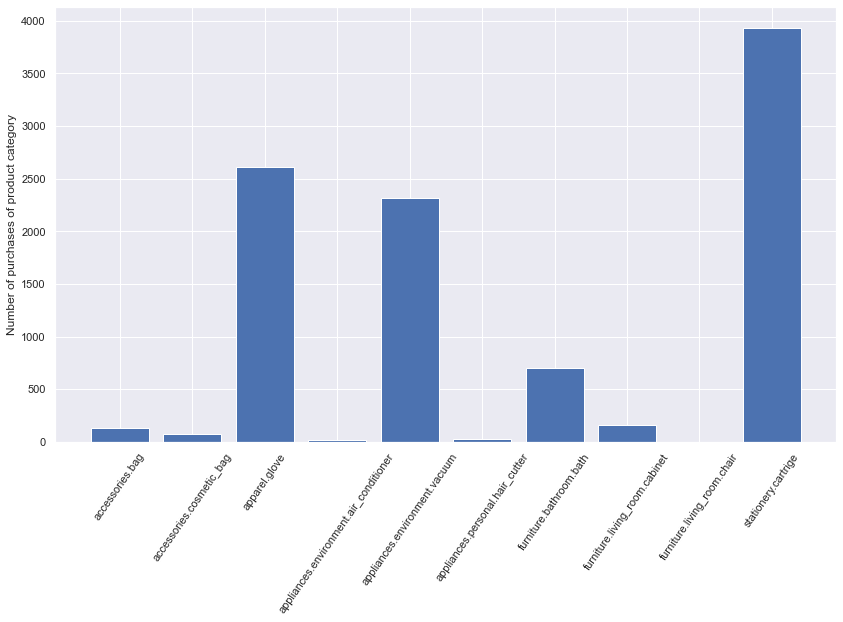

In [417]:
fig = plt.figure(12, figsize=(14,8))
ax = plt.gca()

ax.bar(category_purchases.index, category_purchases)

ax.set(ylabel="Number of purchases of product category")

for tick in ax.get_xticklabels():
    tick.set_rotation(55)
fig.align_xlabels()

fig.show()

In the chart we see that a few categories dominate purchases (in terms of quantity), but how are quantity and sales generated correlated? Let's plot the sales of the categories below.

In [420]:
category_sales = purchases.groupby('category_code').price.sum()

<ipython-input-421-0b6ef8d25a57>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



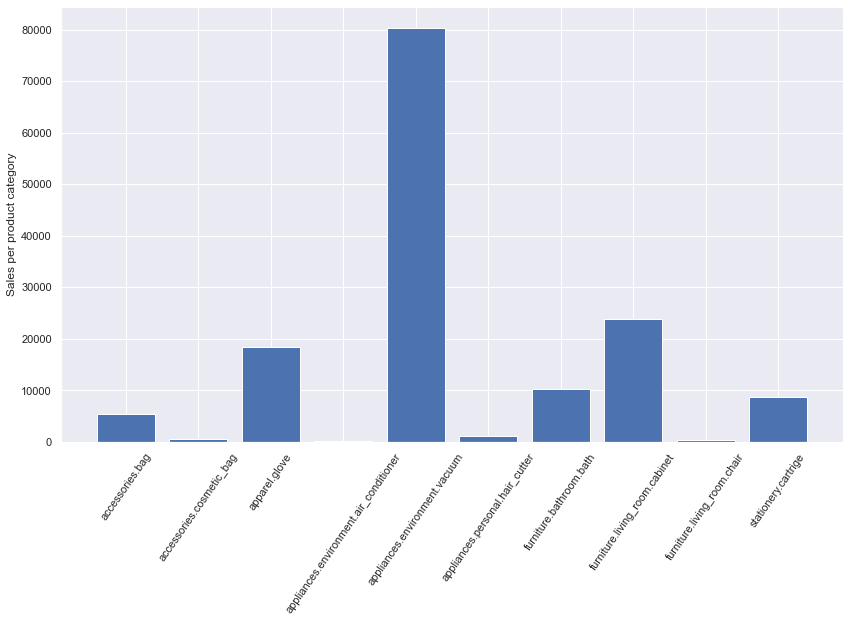

In [421]:
fig = plt.figure(13, figsize=(14,8))
ax = plt.gca()

ax.bar(category_sales.index, category_sales)

ax.set(ylabel="Sales per product category")

for tick in ax.get_xticklabels():
    tick.set_rotation(55)
fig.align_xlabels()

fig.show()

Comparing the two charts, we see that products in appliances.environment.vacuum dominate sales and also have a high purchase rate. Products in stationary.cartridge, on the other hand, are purchased at a high rate but don't generate much sales volume. This could be an opportunity to raise prices. Stationary.cartridge products are clearly in high demand, so it may be possible to increase the profit margin of some of those products without losing too much volume.

## Conclusion

We've looked at the data from a few angles and drawn some basic conclusions. We found that, at least over these three months, sales activity is fairly volatile but does show some pattern of increase on certain days. We also plotted the distribution of volume by customers, brands, and products, which can be helpful when trying to understand where to focus your marketing attention and budget. Looking at event types, we found the cart abandonment rate over the time period and determined the number of users who visit the site to view products but don't make a purchase.

Further and closer analysis could tell us what products are popular among the biggest customers, which products are falling out of fashion (although in this small time frame such a change may be indiscernable), what time of day users tend to make purchases, whether customers tend (when buying products of a certain category, say) to buy the same or different brands, whether the "whale" customers are also the most frequent customers, and so on. With more data, machine learning models could also be used to make predictions of sales and other activity.